In [8]:
import sys 
sys.path.append('/Users/lei/home/studyhall/modeling-rsa/lib') 
  
import pickle 
import pandas as pd
from tqdm import tqdm 

import torch  
import tensorflow as tf 
 
from ffnn import FFNN 
from utils import * 
from old_plots import * 
from preprocessor import * 
 

In [9]:
pt_ffnn = FFNN('cpu')
tf_ffnn = tf.keras.models.load_model("/Users/lei/home/studyhall/modeling-rsa/training/models/tf_ffnn_300e_1e-4lr_checkpoint.h5") 
rf = pickle.load(open("/Users/lei/home/studyhall/modeling-rsa/training/models/rf.pkl", 'rb')) 

In [10]:
corpus = load("/Users/lei/home/studyhall/modeling-rsa/dns_29_periodic_hills_dataset/alph05-4071-2024.dat")
print(np.shape(corpus)) 
print(len(columns)) 

(98688, 15)
15


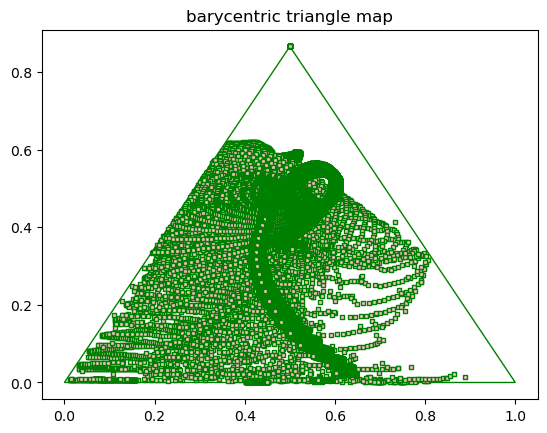

In [4]:
plot_barcentric_old(corpus, -1)

3084/3084 [==============================] - 2s 517us/step


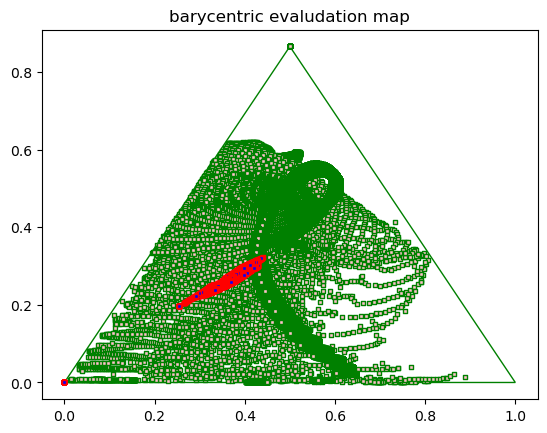

In [6]:
p = Preprocessor(corpus) 
selected_is = select(corpus, 'x', -1) 
qvalues = dict((i, np.array([p.q1(i), p.q4(i), p.q6(i), p.q7(i), p.q10(i)])) for i in selected_is) 
cs_pred = np.nan_to_num(tf_ffnn.predict(np.array([qvalue for _, qvalue in qvalues.items()])))
evaluate(corpus, -1, cs_pred)

100%|██████████| 257/257 [00:01<00:00, 152.87it/s]


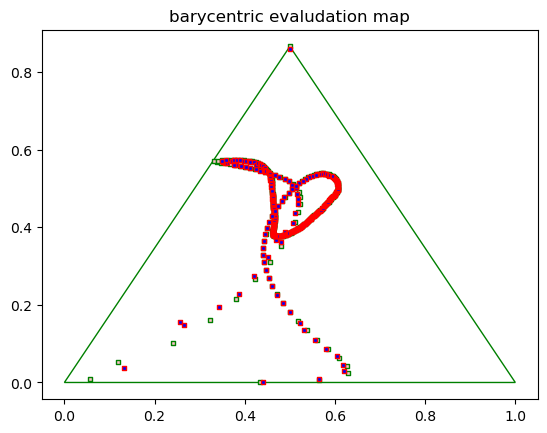

In [15]:
p = Preprocessor(corpus) 
selected_is = select(corpus, 'x', 3) 
features = dict((i, np.nan_to_num([p.liutex(i) ** 2, 
                                   p.sheer(i) ** 2, 
                                   p.liutex(i) * p.sheer(i), 
                                   p.q1(i), 
                                   p.q4(i), 
                                   p.q6(i), 
                                   p.q7(i), 
                                   p.q10(i)])) for i in selected_is) 
cs_pred = [rf.predict([feature])[0] for _, feature in tqdm(features.items())] 
evaluate(corpus, 3, cs_pred) 